In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cartoyota.csv', encoding='latin1')
data.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


## Understanding the Data

In [3]:
print(f'Rows & Columns : {data.shape}')

Rows & Columns : (1436, 38)


Take only a few columns that are considered important for the modeling process later

In [4]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
newdata = data[["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]]
newdata.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
newdata.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
# See the new data info
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
# Rename some columns
newdata = newdata.rename({'Age_08_04' : 'Age', 'cc' : 'CC', 'Quarterly_Tax' : 'QT'}, axis=1)
newdata.tail()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


Check missing value & duplicated data

In [9]:
newdata.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [10]:
print(newdata[newdata.duplicated()].shape)
newdata[newdata.duplicated()]

(1, 9)


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
# Drop duplicate data
newdata = newdata.drop_duplicates().reset_index(drop=True)
newdata[newdata.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


Define Discrete & Continuous Feature from new dataset 

In [12]:
dis_feature = [feature for feature in newdata.columns if len(newdata[feature].unique()) < 20 and feature]
dis_feature[:]

['HP', 'CC', 'Doors', 'Gears', 'QT']

In [13]:
cont_feature = [feature for feature in newdata.columns if newdata[feature].dtype != 'O' and feature not in dis_feature ]
cont_feature[:]

['Price', 'Age', 'KM', 'Weight']

## Exploratory Data Analysis

#### Visualize Distribution of Continuous Features with Histograms & Probability Plot

In [14]:
import pylab
import scipy.stats as stats

def plot_data(data, feature):
    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    data[feature].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(data[feature], dist='norm', plot=pylab)

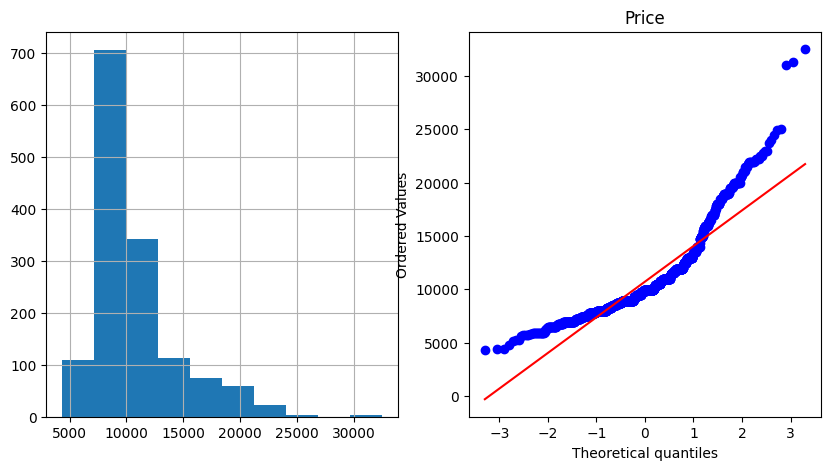

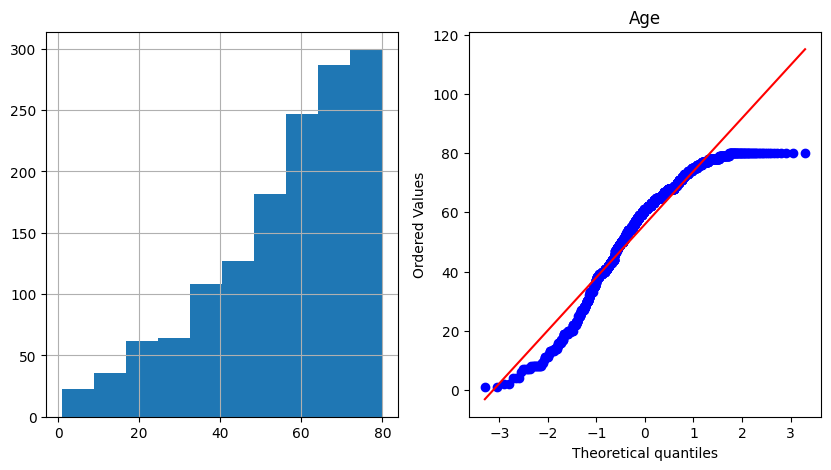

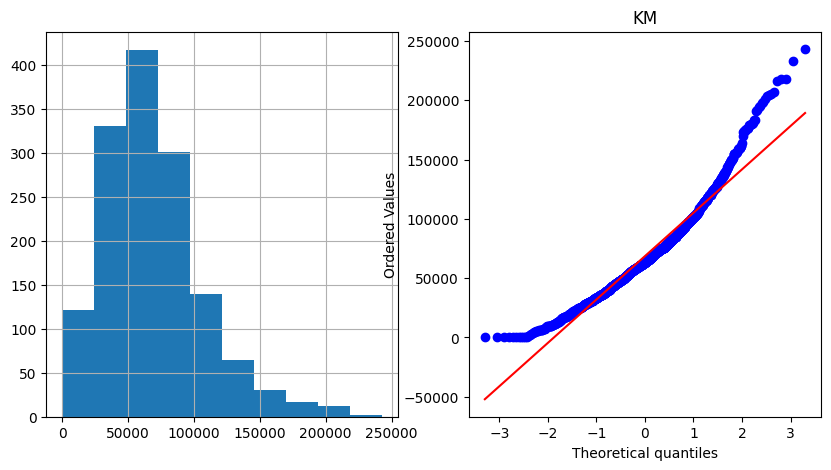

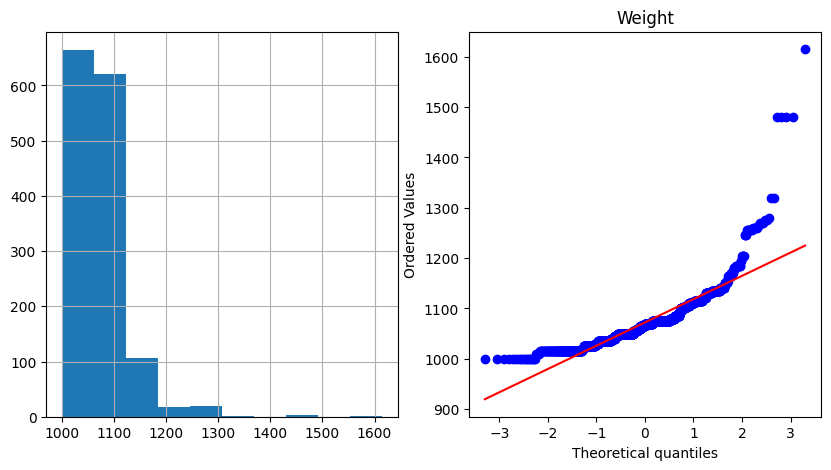

In [15]:
for i in cont_feature:
    plot_data(newdata, i)
    plt.title(i)

#### Visualize relationship between independent feature & dependent feature (Price)

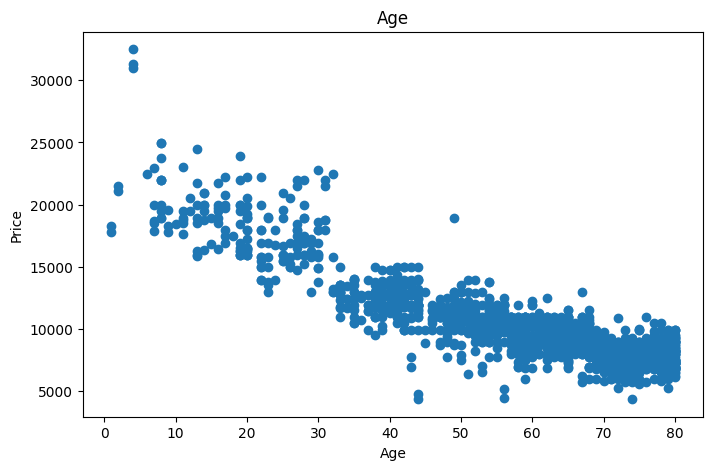

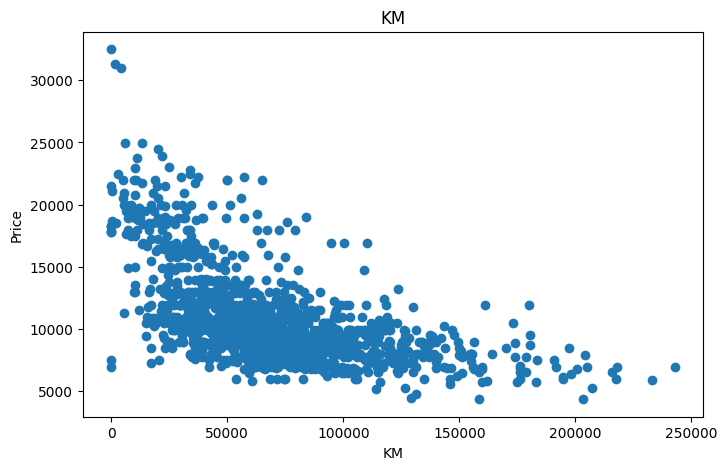

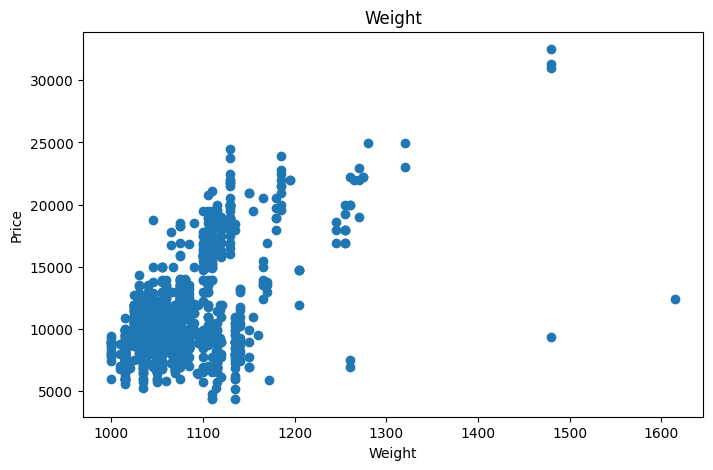

In [16]:
for i in cont_feature:
    if i != 'Price':
        plt.figure(figsize=(8,5))

        plt.scatter(newdata[i], newdata['Price'])
        plt.xlabel(i)
        plt.ylabel('Price')
        plt.title(i)

        plt.show()

#### Analysis Relationship between discrete feature & Price

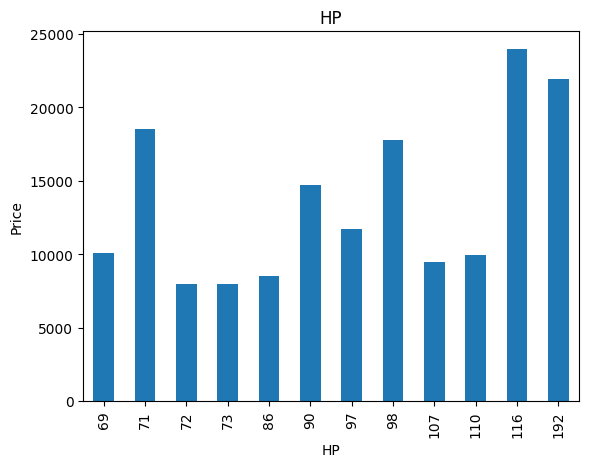

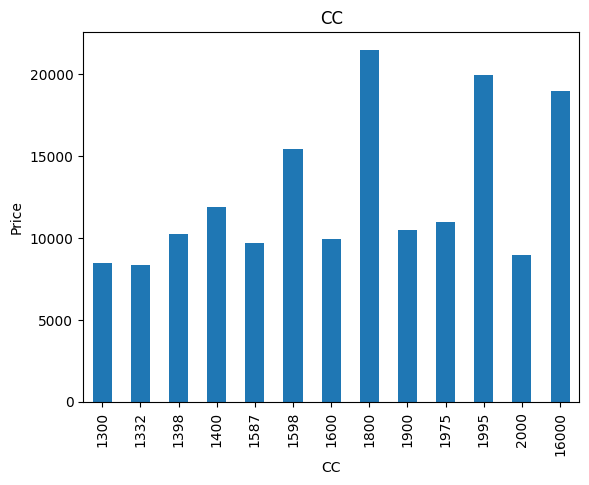

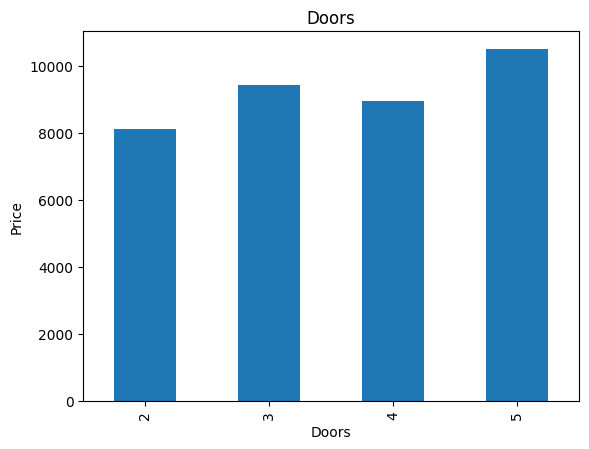

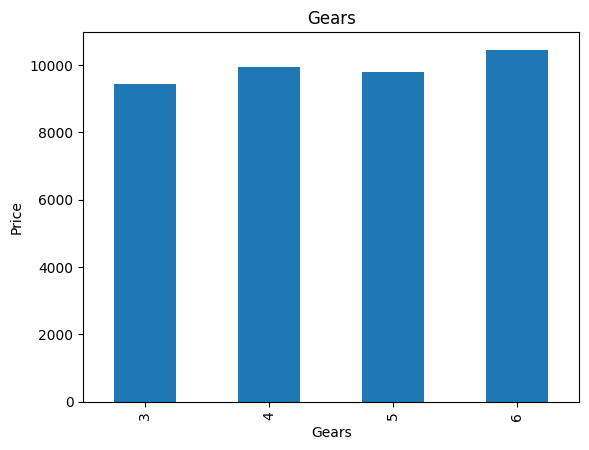

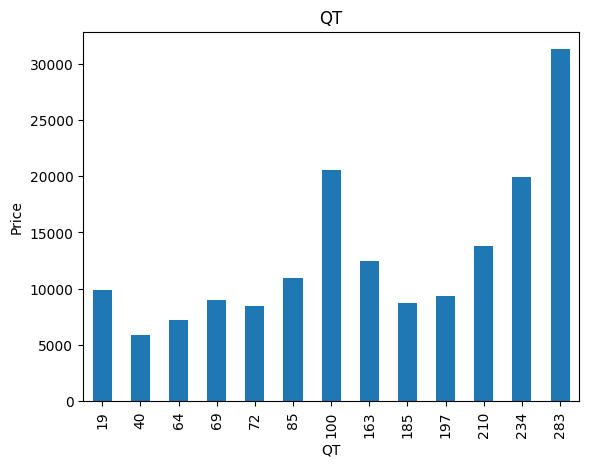

In [17]:
for i in dis_feature:
    newdata.groupby(i)['Price'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title(i)
    plt.show()

#### Checking Outliers / Influencers with Cook's Distance & Leverage Value

In [18]:
import statsmodels.formula.api as smf

data_model = smf.ols("Price ~ Age + KM + Weight + HP + CC + Gears + QT + Doors", data = newdata).fit()

See influencers value with using cook's distance

In [19]:
influence_points = data_model.get_influence()
c, p_value = influence_points.cooks_distance
c, p_value

(array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
        8.04110551e-07, 6.99854767e-04, 1.08408002e-02]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999998]))

See Leverage Value using High Influence Points 

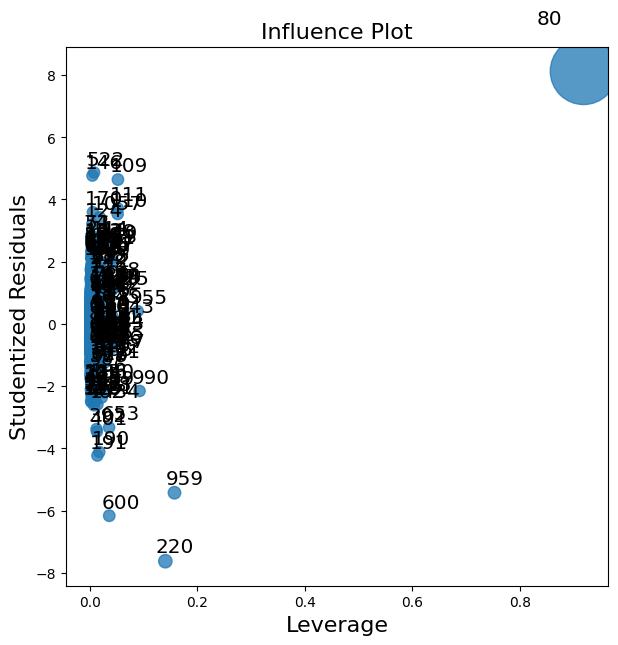

In [20]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(7,7))
fig = influence_plot(data_model, ax=ax)
plt.show()

Plot the influencers & plot cut-off line use stem plot

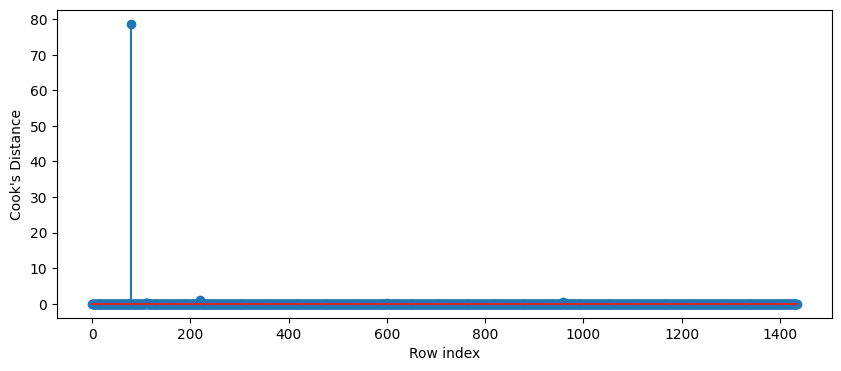

In [21]:
def plot_influencerCF(x = [0, 48], y = [0.1, 0.1], y1 = [0.05, 0.05], data=newdata):
    plt.figure(figsize = (10,4))
    plt.plot(x, y,color='darkred', linewidth=2)
    plt.plot(x , y1, color = 'red', linewidth = 2)
    plt.stem(np.arange(len(data)), np.round(c, 3))
    plt.xlabel('Row index')
    plt.ylabel("Cook's Distance")

    plt.show()

plot_influencerCF()

Find index & value of Influencer (C > 0.5)

In [22]:
np.argmax(c), np.max(c)

(80, 78.7295058225186)

In [23]:
newdata[newdata.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Data Pre-processing

Make new dataframe with drop the influencer value

In [24]:
newdf = newdata.copy()
newdf = newdf.drop(newdf.index[[80]], axis=0).reset_index(drop=True)

# Comparison shape
print(newdata.shape)
print(newdf.shape)

newdf.head()

(1435, 9)
(1434, 9)


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


Using statistical regression modelling (OLS) to see the improved accuracy (R-squared)

In [25]:
k = newdf.shape[1]
n = newdf.shape[0]
leverage_cutoff = (3*(k+1))/n

while np.max(c) > leverage_cutoff:
    model = smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight', data=newdf).fit()
    (c, _) = model.get_influence().cooks_distance
    np.argmax(c), np.max(c)
    newdf = newdf.drop(newdf.index[[np.argmax(c)]], axis=0).reset_index(drop=True)
else:
    final_model = smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight', data=newdf).fit()
    print("Final improved Model accuracy : ", final_model.rsquared)

Final improved Model accuracy :  0.8960864004304145


In [26]:
influence_points = final_model.get_influence()
c, p_value = influence_points.cooks_distance
c, p_value

(array([8.18666846e-03, 4.24327306e-03, 5.81580166e-03, ...,
        3.22220537e-03, 2.45735541e-05, 1.47560469e-03]),
 array([0.99999999, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]))

In [27]:
print(newdf.shape)
newdf.head()

(1415, 9)


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


Plot the influencer & cut-off line

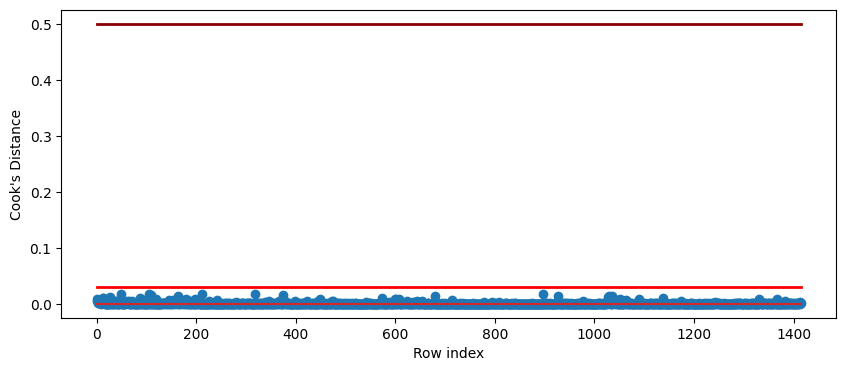

In [28]:
plot_influencerCF(x=[0, 1415], y=[0.5, 0.5], y1=[0.03, 0.03], data=newdf)

#### Transformation Data using StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler

features = newdf[newdf.columns]
std_scaler = StandardScaler().fit(features.values)

features = std_scaler.transform(features.values)
newdf_scaled = pd.DataFrame(features, columns=newdf.columns)

newdf_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0.812024,-1.792982,-0.581019,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.013025
1,0.883978,-1.792982,0.118411,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.013025
2,0.941541,-1.738892,-0.723191,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.013025
3,1.229357,-1.630713,-0.553690,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.013025
4,0.883978,-1.414355,-0.809733,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.119377


## Exploratory Data Analysis 2

### Set Feature Selection 

Correlation Coefficient

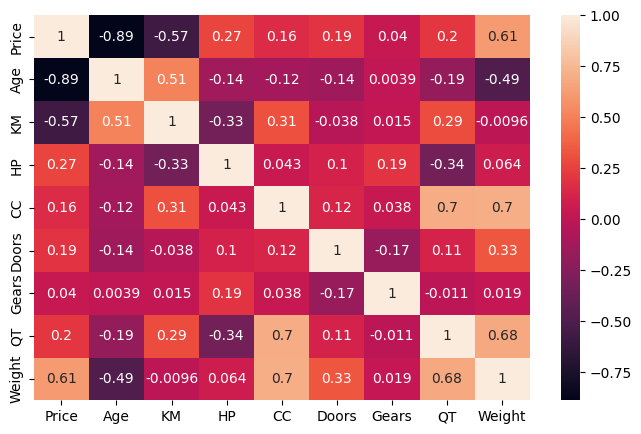

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(newdf.corr(), annot=True)
plt.show()

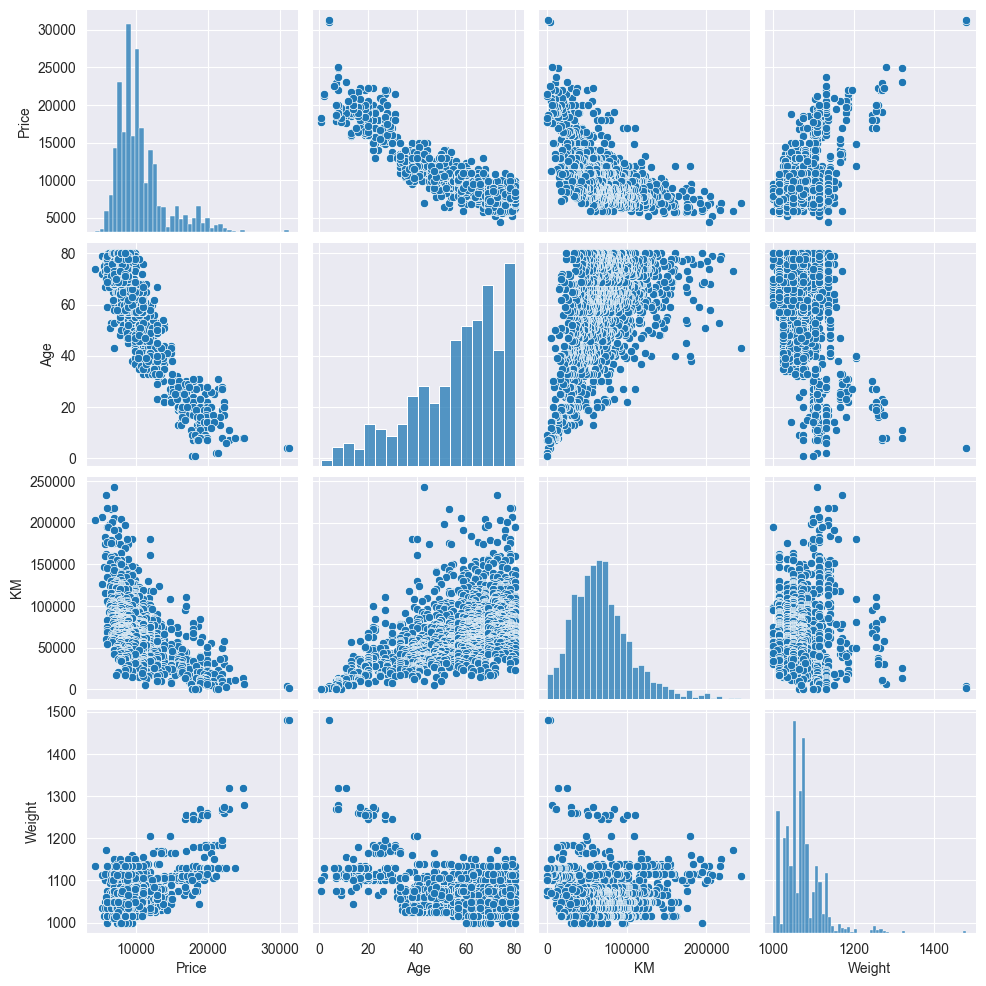

In [31]:
sns.set_style(style='darkgrid')
sns.pairplot(newdf[cont_feature])
plt.show()

## Train the Model

#### Try PCA on Scaled Dataset

In [32]:
from sklearn.decomposition import PCA

array = newdf_scaled.values
x = array[:, 1:]
y = array[:, 0]

# PCA
pca = PCA()
pca.fit(x)

PCA()

See the variance ratio in data

In [33]:
# Amount of variance that each PCA explains is
variance = pca.explained_variance_ratio_
variance[:] * 100

array([32.89370451, 22.9851236 , 14.92104303, 12.26370331,  8.42129667,
        4.05649305,  2.37941708,  2.07921875])

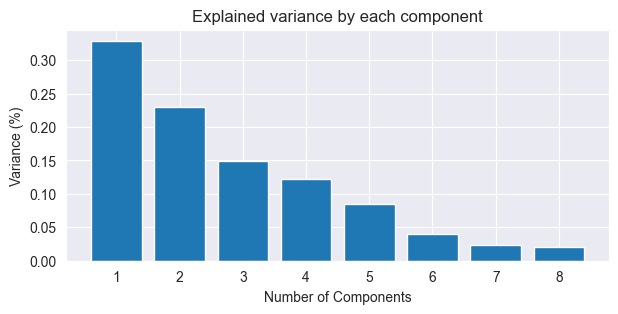

In [34]:
plt.figure(figsize=(7,3))
plt.bar(range(1, len(variance)+1),variance)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained variance by each component')
plt.show()

In [35]:
# See the cummulative variance
variance_1 = np.cumsum(np.round(variance,decimals = 4)*100)
variance_1

array([ 32.89,  55.88,  70.8 ,  83.06,  91.48,  95.54,  97.92, 100.  ])

#### Convert the PCA result into dataframe

In [36]:
pca_newdfStd = pca.fit_transform(x)
pca_newdfStd = pd.DataFrame(data = pca_newdfStd, columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8'])

pca_newdfStd.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,4.188870,0.241424,-0.340592,-2.298491,0.821049,-0.498966,0.073663,-0.481326
1,4.276369,-0.192878,-0.412960,-2.107000,0.809163,-0.009463,0.178998,-0.468204
2,4.157875,0.300939,-0.331409,-2.315291,0.829087,-0.632062,0.055468,-0.468727
3,4.152659,0.138160,-0.360001,-2.224636,0.837452,-0.580628,0.087427,-0.435015
4,4.127483,0.201474,-0.358977,-2.205313,0.865429,-0.893211,0.072980,-0.293721


Add Price into DataFrame

In [37]:
newdf.Price

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1410     8450
1411     7500
1412    10845
1413     8500
1414     7250
Name: Price, Length: 1415, dtype: int64

In [38]:
pca_newdfStd['Price'] = y
pca_newdfStd.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Price
0,4.188870,0.241424,-0.340592,-2.298491,0.821049,-0.498966,0.073663,-0.481326,0.812024
1,4.276369,-0.192878,-0.412960,-2.107000,0.809163,-0.009463,0.178998,-0.468204,0.883978
2,4.157875,0.300939,-0.331409,-2.315291,0.829087,-0.632062,0.055468,-0.468727,0.941541
3,4.152659,0.138160,-0.360001,-2.224636,0.837452,-0.580628,0.087427,-0.435015,1.229357
4,4.127483,0.201474,-0.358977,-2.205313,0.865429,-0.893211,0.072980,-0.293721,0.883978


#### Test the PCA Dataframe with modelling using OLS

Make model for PCA

In [39]:
pca_model = smf.ols('Price ~ PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8', data=pca_newdfStd).fit()

print('R-squared     :',pca_model.rsquared.round(3))
print('Adj.R-squared :',pca_model.rsquared_adj.round(3))
print('AIC Value     :',pca_model.aic.round(3))
print('BIC Value     :',pca_model.bic.round(3))

R-squared     : 0.896
Adj.R-squared : 0.895
AIC Value     : 829.759
BIC Value     : 877.053


Transform 'Price' in newdf dataset & Predict PCA dataset

In [40]:
from sklearn.metrics import mean_squared_error

transformer_y = StandardScaler().fit(newdf['Price'].to_numpy().reshape(-1,1))
# Scale the test dataset
y_train_scal = transformer_y.transform(newdf['Price'].to_numpy().reshape(-1,1))

# Predict with the trained model
predict = pd.DataFrame(pca_model.predict(pca_newdfStd))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(newdf.Price, predict_unscaled)))
print("R2_score          : ", pca_model.rsquared)
print("R2_Adjusted_score : ", pca_model.rsquared_adj)
print("RMSE              : ", rmse_linear)

R2_score          :  0.8960864004304144
R2_Adjusted_score :  0.8954951423958791
RMSE              :  1120.007250832069


In [41]:
pca_newdfStd['Price'] = newdf['Price']
pca_newdfStd.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Price
0,4.188870,0.241424,-0.340592,-2.298491,0.821049,-0.498966,0.073663,-0.481326,13500
1,4.276369,-0.192878,-0.412960,-2.107000,0.809163,-0.009463,0.178998,-0.468204,13750
2,4.157875,0.300939,-0.331409,-2.315291,0.829087,-0.632062,0.055468,-0.468727,13950
3,4.152659,0.138160,-0.360001,-2.224636,0.837452,-0.580628,0.087427,-0.435015,14950
4,4.127483,0.201474,-0.358977,-2.205313,0.865429,-0.893211,0.072980,-0.293721,13750


#### Set the Train & Test dataset, scalling the train & test dataset

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score

feature = pca_newdfStd.iloc[:,:-1]
target = pca_newdfStd.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=12)

print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ", x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (990, 8)
Shape of X_test  :  (425, 8)
Shape of y_train :  (990,)
Shape of y_test  :  (425,)


Scale the train & test dataset

In [44]:
transformer_x = StandardScaler().fit(x_train.to_numpy().reshape(-1,1))
transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1))

x_train_scal = transformer_x.transform(x_train.to_numpy().reshape(-1,1))
x_test_scal = transformer_x.transform(x_test.to_numpy().reshape(-1,1))

y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))

#### Do the modelling using Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train_scal)

LinearRegression()

In [46]:
prediction = lin_reg.predict(x_test)

prediction_unscaled = transformer_y.inverse_transform(prediction)

In [47]:
cross_val = cross_val_score(estimator = lin_reg, X = x_train, y = y_train_scal, cv = 10)

y_pred_train = lin_reg.predict(x_train)
r2_score_train = r2_score(y_train_scal, y_pred_train)

y_pred_test = lin_reg.predict(x_test)
r2_score_test = r2_score(y_test_scal, y_pred_test)

rmse_test = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))

Get range of Dependent Variable (Price) for RMSE evaluation metrics

In [53]:
print(pca_newdfStd["Price"].min())
print(pca_newdfStd["Price"].max())

4400
31275


In [48]:
print("Cross Validation Score   : ", cross_val.mean())
print("R2 Score (Train)         : ", r2_score_train)
print("R2 Score (Test)          : ", r2_score_test)
print("RMSE (Test)              : ", rmse_test)

Cross Validation Score   :  0.886584406164688
R2 Score (Train)         :  0.892373719425433
R2 Score (Test)          :  0.9028720800355178
RMSE (Test)              :  1112.2249773038372


Compared predicted Price with actual Price from newdf dataframe

In [49]:
predicted = pd.DataFrame(prediction_unscaled, columns=['Predict_Price'])
predicted['Price'] = newdf.Price
predicted['Age'] = newdf.Age
predicted['KM'] = newdf.KM
predicted['Weight'] = newdf.Weight
predicted['HP'] = newdf.HP
predicted['CC'] = newdf.CC
predicted['Gears'] = newdf.Gears
predicted['QT'] = newdf.QT
predicted['Doors'] = newdf.Doors

In [50]:
# Show the dataframe
predicted.sample(20)

,Predict_Price,Price,Age,KM,Weight,HP,CC,Gears,QT,Doors
275,11314.084604,9950,37,44757,1025,97,1400,5,69,3
320,10019.545929,11950,38,32781,1075,110,1600,5,85,5
100,5620.496755,19450,11,14635,1155,110,1600,5,100,3
27,9306.773372,17950,30,11090,1120,110,1600,5,85,3
221,10783.086338,12900,41,61200,1045,110,1600,5,69,3
348,9965.396554,12950,39,24444,1040,110,1600,5,69,3
169,18515.363641,19950,7,6250,1115,110,1600,5,85,5
170,8006.752155,21950,8,5000,1130,110,1600,5,85,5
49,10895.899566,20500,26,56000,1180,110,1600,5,100,5
326,13091.733228,12750,43,30742,1040,110,1600,5,69,3
